In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from common.preprocessor import load_data
from sklearn.preprocessing import MinMaxScaler
# from sklearn.
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = load_data('data', 'Commodity Prices Monthly.csv')
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


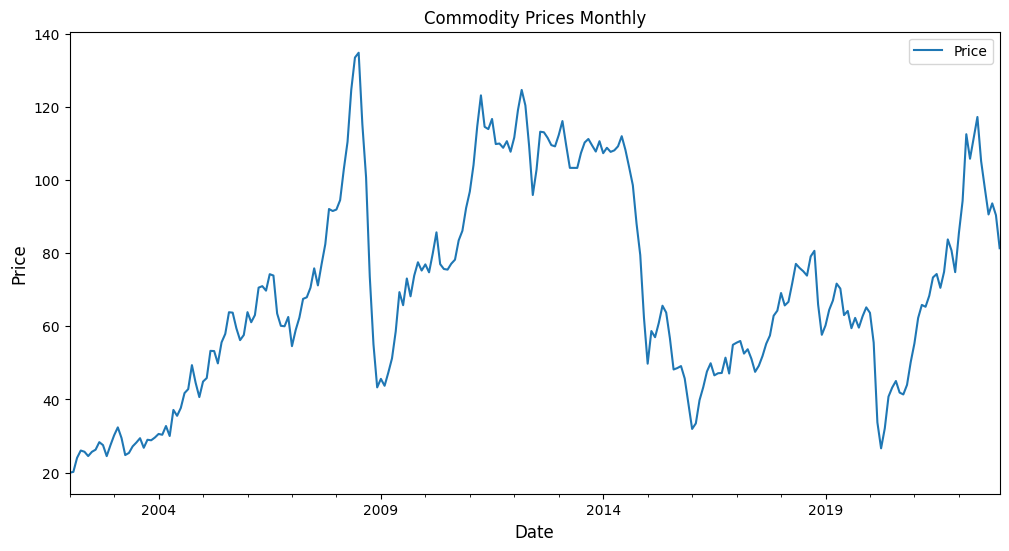

In [19]:
data.plot(y='Price', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [20]:
# set the train and test data with start dates
train_start_date = '2002-01-01'
test_start_date = '2019-01-01'

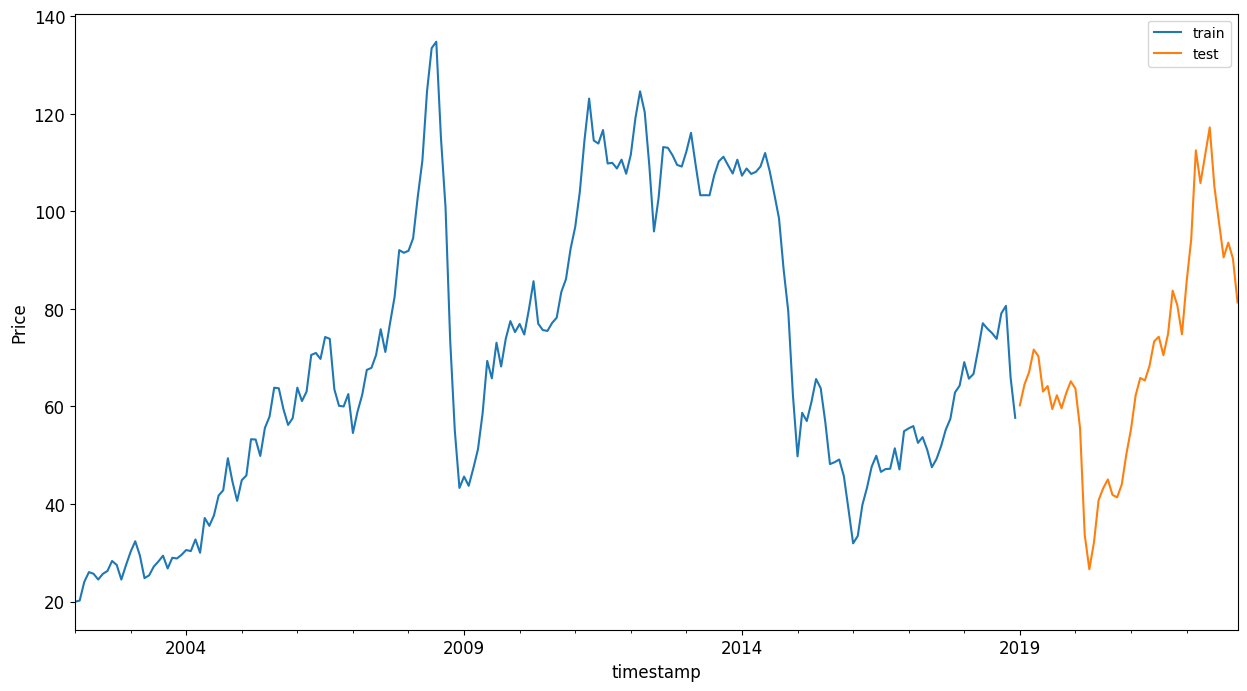

In [21]:
# visualize the train and test data
data[(data.index < test_start_date) & (data.index >= train_start_date)][['Price']].rename(columns={'Price':'train'}) \
    .join(data[test_start_date:][['Price']].rename(columns={'Price':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [22]:
# set the train and test data and print the dimensions of it
train = data.copy()[(data.index >= train_start_date) & (data.index < test_start_date)][['Price']]
test = data.copy()[data.index >= test_start_date][['Price']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (204, 1)
Test data shape:  (48, 1)


In [23]:
train

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69
...,...
2018-08-01,73.85
2018-09-01,79.09
2018-10-01,80.63
2018-11-01,65.96


In [24]:
test

,Price
2019-01-01,60.23
2019-02-01,64.50
2019-03-01,67.05
2019-04-01,71.66
2019-05-01,70.30
2019-06-01,63.05
2019-07-01,64.19
2019-08-01,59.47
2019-09-01,62.29
2019-10-01,59.63


In [25]:
# Prepare data for training
scaler = MinMaxScaler()
scaled_train = train.copy()
scaled_test = test.copy()
scaled_train['Price'] = scaler.fit_transform(scaled_train[['Price']])
print(f'Scaled Training Set: {scaled_train.shape}\nScaled Testing Set {scaled_test.shape}')

Scaled Training Set: (204, 1)
Scaled Testing Set (48, 1)


In [28]:
# scaled_train_data.head()

In [32]:
# Convert to numpy arrays
scaled_train_data = scaled_train.values
scaled_test_data = scaled_test.values

In [33]:
timesteps = 5

In [34]:
scaled_train_data_timesteps=np.array([[j for j in scaled_train_data[i:i+timesteps]] for i in range(0,len(scaled_train_data)-timesteps+1)])[:,:,0]
scaled_train_data_timesteps.shape

(200, 5)

In [35]:
scaled_train_data

array([[0.        ],
       [0.00200296],
       [0.0354437 ],
       [0.05286075],
       [0.04989985],
       [0.03962379],
       [0.04972568],
       [0.05486371],
       [0.07280327],
       [0.06574937],
       [0.03953671],
       [0.06522686],
       [0.08900113],
       [0.10798572],
       [0.08264391],
       [0.04206218],
       [0.04711312],
       [0.06270138],
       [0.07184534],
       [0.08220848],
       [0.05939214],
       [0.07846382],
       [0.07724462],
       [0.08377602],
       [0.09231037],
       [0.0903945 ],
       [0.11120787],
       [0.0874336 ],
       [0.14952539],
       [0.13550466],
       [0.15422799],
       [0.1895846 ],
       [0.1990769 ],
       [0.25620482],
       [0.21414265],
       [0.18009231],
       [0.21701646],
       [0.22546373],
       [0.29016807],
       [0.28964556],
       [0.26029783],
       [0.31037185],
       [0.33066272],
       [0.38213011],
       [0.38108508],
       [0.34381259],
       [0.31568405],
       [0.327

In [36]:
scaled_test_data_timesteps=np.array([[j for j in scaled_test_data[i:i+timesteps]] for i in range(0,len(scaled_test_data)-timesteps+1)])[:,:,0]
scaled_test_data_timesteps.shape

(44, 5)

In [37]:
x_train, y_train = scaled_train_data_timesteps[:,:timesteps-1],scaled_train_data_timesteps[:,[timesteps-1]]
x_test, y_test = scaled_test_data_timesteps[:,:timesteps-1],scaled_test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(200, 4) (200, 1)
(44, 4) (44, 1)


In [38]:
SVR??

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Source:        
class SVR(RegressorMixin, BaseLibSVM):
    """Epsilon-Support Vector Regression.

    The free parameters in the model are C and epsilon.

    The implementation is based on libsvm. The fit time complexity
    is more than quadratic with the number of samples which makes it hard
    to scale to datasets with more than a couple of 10000 samples. For large
    datasets consider using :class:`~sklearn.svm.LinearSVR` or
    :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
    :class:`~sklearn.kernel_approximation.Nystroem` transformer or
    other :ref:`kernel_approximation`.

    Read more in the :ref:`User Guide <svm_regression>`.

    Parameters
    ----------
    kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,  \

In [40]:
# check 
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [41]:
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [42]:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=10, epsilon=0.05, gamma=0.5)

In [43]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(200, 1) (44, 1)


In [44]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

200 44


In [45]:
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

200 44


In [46]:
train_timestamps = data[(data.index < test_start_date) & (data.index >= train_start_date)].index[timesteps-1:]
test_timestamps = data[test_start_date:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

200 44


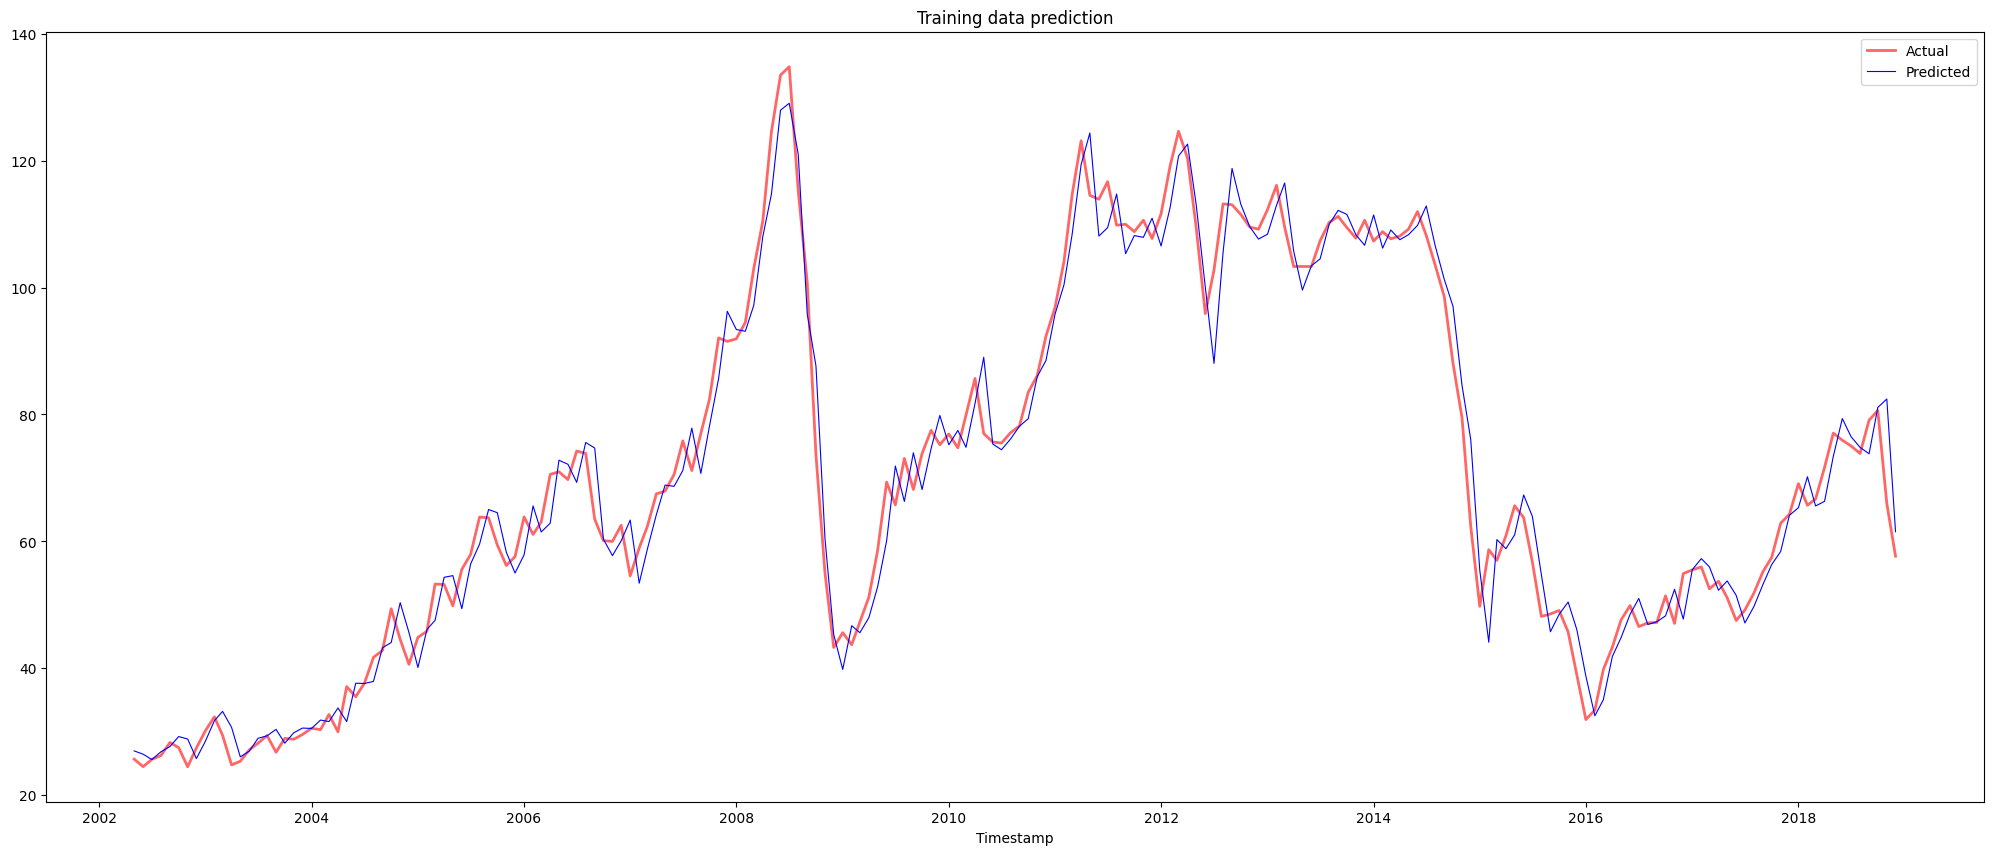

In [48]:
plt.figure(figsize=(25,10))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_train_pred,y_train)
mape

0.05742006914810534

In [52]:
y_test_pred

array([[41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142]])

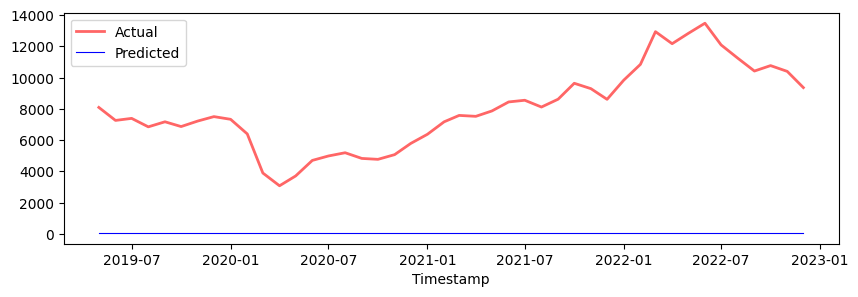

In [53]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [56]:
## check performance on full dataset

In [57]:
# Extracting load values as numpy array
full_data = data.copy().values

# Scaling
full_data = scaler.transform(full_data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in full_data[i:i+timesteps]] for i in range(0,len(full_data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)

Tensor shape:  (248, 5)
X shape:  (248, 4) 
Y shape:  (248, 1)


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [58]:
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)

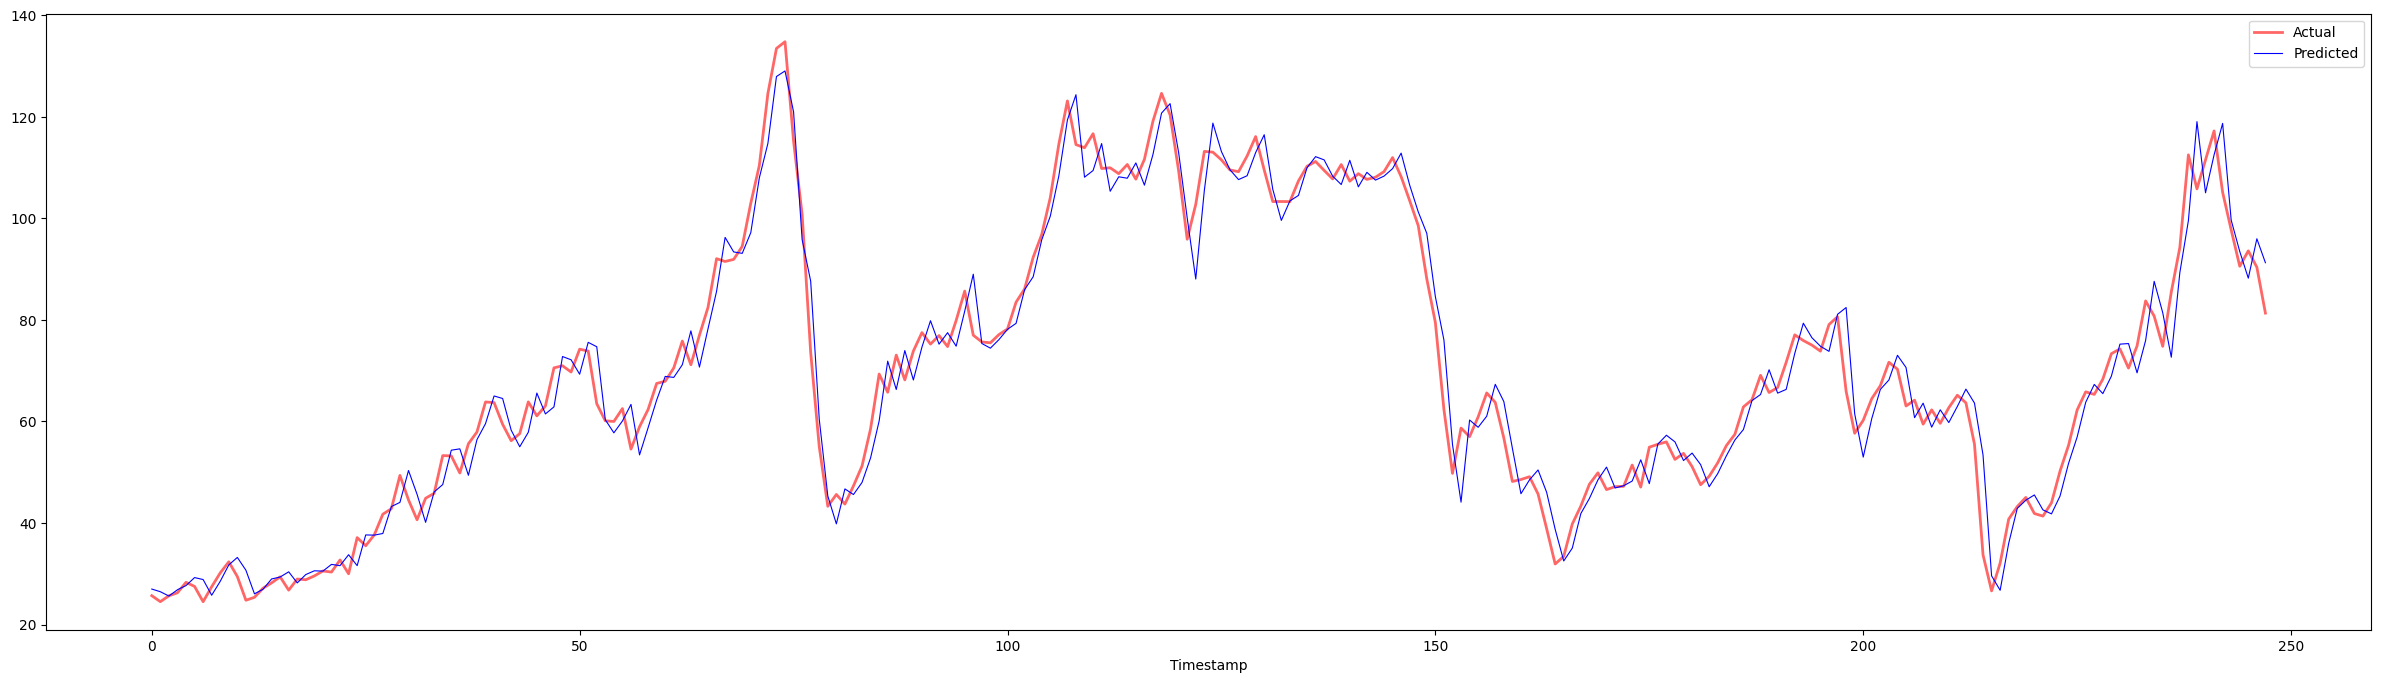

In [59]:
plt.figure(figsize=(30,8))
plt.plot(Y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error 
print(f'MAE : {mean_absolute_error(Y, Y_pred)}') 

MAE : 3.980276005484283


In [61]:
print(f'MAPE : {mean_absolute_percentage_error(Y_pred,Y)}%')

MAPE : 0.06118944740677382%
